In [3]:
import h5py
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from collections import defaultdict
import h5py
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
import os
import regex as re
from collections import defaultdict

In [5]:
def get_Ic_time(t, V):
    """
    Find the current where voltage transitions
    from flat (0) to nearly vertical.
    
    Parameters:
    - t: array-like, time values (s)
    - V: array-like, voltage values (mV)
    
    Returns:
    - tIc: float, estimated time at which critical current is reached (s)
    """
    t = np.array(t)
    V = np.array(V)

    # Define a small threshold to account for noise
    threshold = 10

    # Find indices where voltage is below the threshold
    zero_resistance_indices = np.where(V <= threshold)[0]

    if len(zero_resistance_indices) > 0:
        # The last voltage where resistance is (effectively) zero
        critical_index = zero_resistance_indices[-1]
        tIc = t[critical_index]
        print(f"Voltage at critical index is {V[critical_index]}:")
        print(f"Critical current time: {tIc}")
        return tIc, V[critical_index]
    else:
        print("No zero-voltage region found.")
        return None

In [13]:
import numpy as np

def get_Ic_times(t, V, slope_threshold=-1e3):
    """
    Find times where the slope of voltage vs. time sharply drops,
    indicating critical current transitions.

    Parameters:
    - t: array-like, time values (s)
    - V: array-like, voltage values (mV)
    - slope_threshold: float, negative threshold for sharp slope drop

    Returns:
    - tIc: np.ndarray, times at which critical current transitions occur
    - vIc: np.ndarray, voltages at those times
    """
    t = np.array(t)
    V = np.array(V)

    # Compute the slope (dV/dt) using numpy.gradient
    dV_dt = np.gradient(V, t)

    # Find indices where slope sharply drops below the threshold
    critical_indices = np.where(dV_dt < slope_threshold)[0]

    if critical_indices.size > 0:
        tIc = t[critical_indices]
        vIc = V[critical_indices]
        print(f"Critical current times: {tIc}")
        return tIc, vIc
    else:
        print("No zero voltage regions found found.")
        return np.array([]), np.array([])


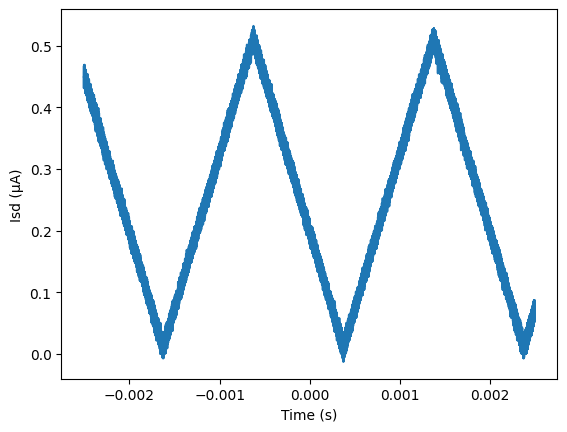

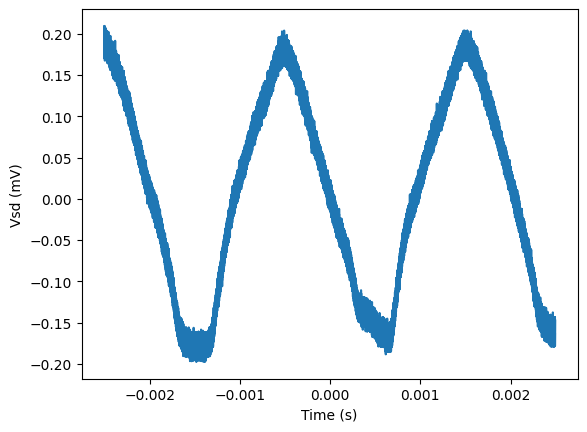

In [ ]:
test_traces_time = pd.read_csv('test_traces0.csv')['Time (s)'].values
test_traces_Isd = pd.read_csv('test_traces0.csv')['Channel 1'].values
test_traces_Vsd = pd.read_csv('test_traces0.csv')['Channel 3'].values

plt.figure()
plt.xlabel('Time (s)')
plt.ylabel('Isd (µA)')
plt.title('Isd vs Time')
plt.plot(test_traces_time, test_traces_Isd, label='Channel 1')

plt.figure()
plt.xlabel('Time (s)')
plt.ylabel('Vsd (mV)')
plt.title('Vsd vs Time')
plt.plot(test_traces_time, test_traces_Vsd, label='Channel 3')

In [5]:
#Getting critical current from Vsd vs t data
get_Ic_time(test_traces_time, test_traces_Vsd)


Voltage at critical index is -0.1630298408:
Critical current time: 0.00249444


np.float64(0.00249444)

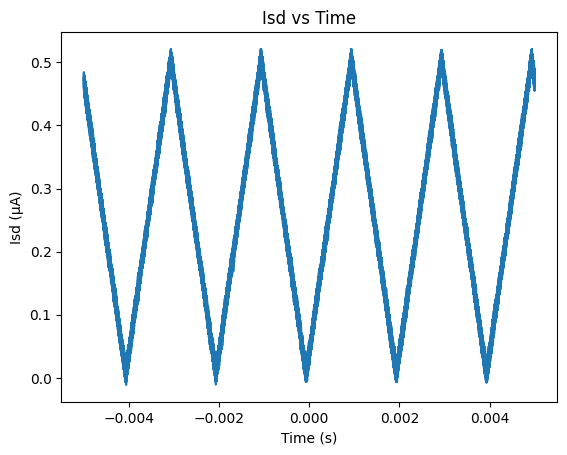

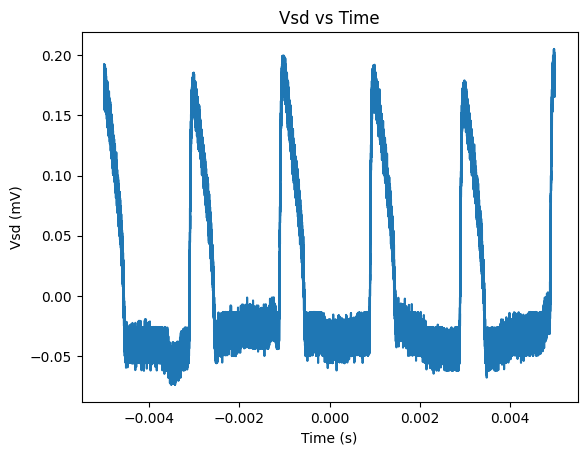

In [16]:
data = pd.read_csv(f'JJ11_f=500Hz_trace1.csv')
time = data['Time (s)'].values
Isd = data['Channel 1'].values
Vsd = data['Channel 3'].values

plt.figure()
plt.xlabel('Time (s)')
plt.ylabel('Isd (µA)')
plt.title('Isd vs Time')
plt.plot(time, Isd, label='Channel 1')

plt.figure()
plt.xlabel('Time (s)')
plt.ylabel('Vsd (mV)')
plt.title('Vsd vs Time')
plt.plot(time, Vsd, label='Channel 3')

Critical current times: [-0.00499997 -0.00499995 -0.00499992 ...  0.00499994  0.00499999
  0.005     ]
Critical current times: [-0.00499999 -0.00499996 -0.00499993 ...  0.00499996  0.00499998
  0.00499999]
Critical current times: [-0.00499997 -0.00499996 -0.00499995 ...  0.00499995  0.00499996
  0.00499997]
Critical current times: [-0.005      -0.00499999 -0.00499996 ...  0.00499996  0.00499999
  0.005     ]
Critical current times: [-0.00499996 -0.00499995 -0.00499991 ...  0.00499998  0.00499999
  0.005     ]
Critical current times: [-0.005      -0.00499997 -0.00499995 ...  0.00499994  0.00499996
  0.00499998]
Critical current times: [-0.005      -0.00499999 -0.00499998 ...  0.00499993  0.00499996
  0.00499997]
Critical current times: [-0.00499997 -0.00499994 -0.00499992 ...  0.00499995  0.00499998
  0.005     ]
Critical current times: [-0.005      -0.00499999 -0.00499998 ...  0.00499996  0.00499999
  0.005     ]
Critical current times: [-0.005      -0.00499999 -0.00499998 ...  0.00471

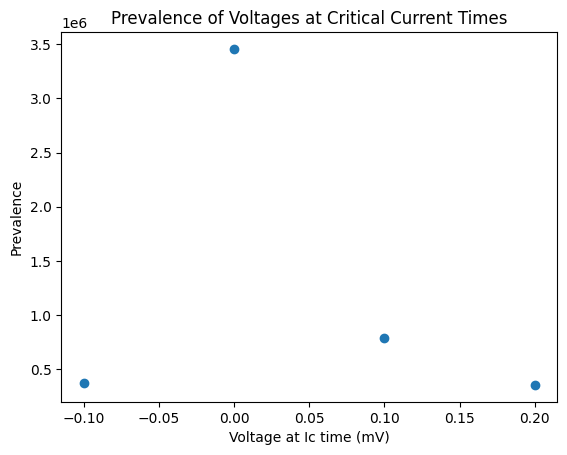

In [15]:
Ic_voltages = defaultdict(int)

for i in range(1,11):
    data = pd.read_csv(f'JJ11_f=500Hz_trace{i}.csv')
    time = data['Time (s)'].values
    Vsd = data['Channel 3'].values
    _, VIcs = get_Ic_times(time, Vsd)
    if len(VIcs) > 0:
        for VIc in VIcs:
            rounded_VIc = round(VIc, 1)
            Ic_voltages[rounded_VIc] += 1

plt.figure()
plt.xlabel('Voltage at Ic time (mV)')
plt.ylabel('Prevalence')
plt.title('Prevalence of Voltages at Critical Current Times')
plt.scatter(list(Ic_voltages.keys()), list(Ic_voltages.values()))